### 1. Data Visualization with pandas
### 2. Data Visualization with matplotlib
### 3. Data Visualization with seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb 
from mpl_toolkits.basemap import Basemap

In [3]:
%matplotlib inline

In [4]:
sample_superStore = pd.read_excel("C:\\Users\\nandh\\Documents\\Power BI\\Power BI Study materials\\Power Bi\\Excel\\Sample - Superstore.xlsx")
sample_superStore.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523


### 1. Data Visulaization with pandas : (plot)

#### Histogram :

In [4]:
r = np.random.randn(50)
df = pd.DataFrame(r)
df.head(3)

,0
0,-0.345544
1,1.126108
2,1.348881


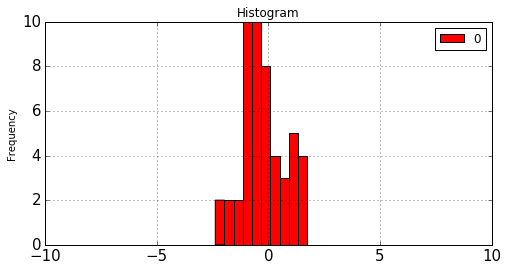

In [6]:
df.plot(kind="Hist",figsize=(8,4),xlim=(-10,10), ylim=(0, 10),grid=True,color='r',title='Histogram',label='numbers',
        use_index=True,legend=True ,fontsize ='15',bins=10)

#### Boxplot :

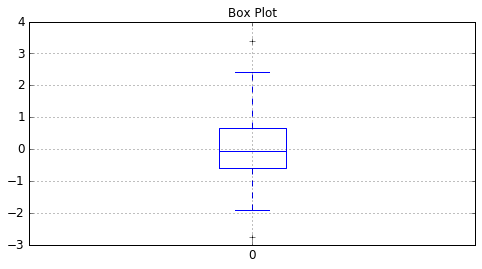

In [61]:
df.plot(kind="box",figsize=(8,4),grid=True,color='b',title='Box Plot',label='numbers',
        use_index=True,legend=True ,fontsize ='12')

#### Density plot :

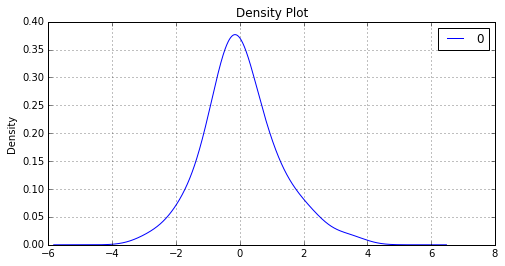

In [60]:
df.plot(kind="kde",figsize=(8,4),grid=True,color='b',title='Density Plot',label='numbers',
        use_index=True,legend=True ,fontsize ='10')

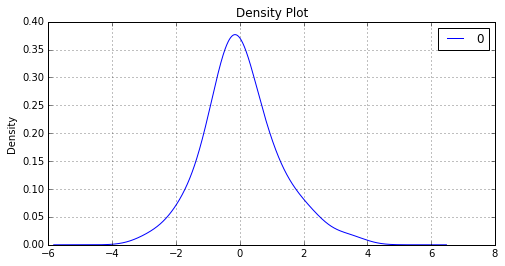

In [82]:
df.plot(kind="density",figsize=(8,4),grid=True,color='b',title='Density Plot',label='numbers',
        use_index=True,legend=True ,fontsize ='10')

#### Vertical Bar Chart :

In [68]:
Profit_by_region=sample_superStore.groupby('Region').Profit.sum().round()
Profit_by_region

Region
Central    519826.0
East       377566.0
South      104201.0
West       310849.0
Name: Profit, dtype: float64

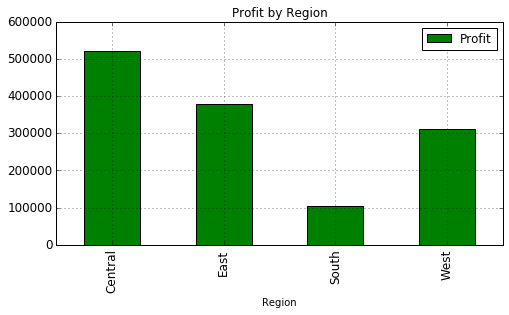

In [80]:
Profit_by_region.plot(kind="bar",figsize=(8,4),grid=True,color='g',title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12')

#### Horizontal Bar chart :

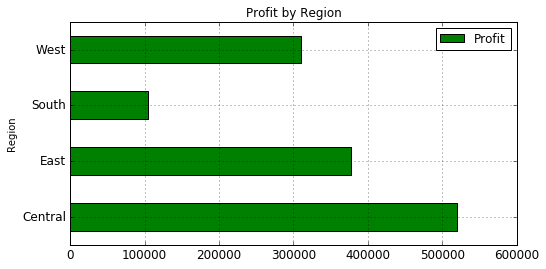

In [81]:
Profit_by_region.plot(kind="barh",figsize=(8,4),grid=True,color='g',title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12')

#### Clustered Bar chart :

In [128]:
Profit_by_region_shipMode = sample_superStore[['Ship Mode','Sales','Profit']].groupby('Ship Mode').agg('sum').round()
Profit_by_region_shipMode

,Sales,Profit
Ship Mode,,
Delivery Truck,3707076.0,268062.0
Express Air,701756.0,150778.0
Regular Air,4543659.0,893602.0


0 Delivery Truck
Sales
3707076.0
Profit
268062.0
1 Express Air
Sales
701756.0
Profit
150778.0
2 Regular Air
Sales
4543659.0
Profit
893602.0


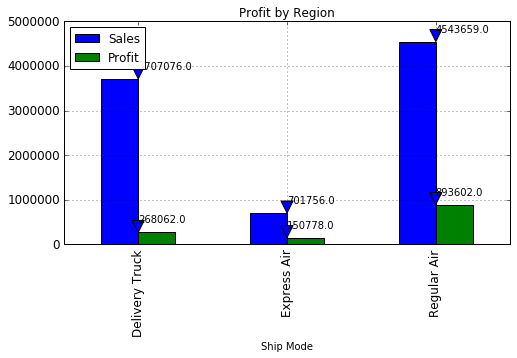

In [198]:
# Link to check annotation:
#https://matplotlib.org/users/annotations_intro.html

profit=Profit_by_region_shipMode.plot(kind="bar",figsize=(8,4),grid=True,title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12',stacked=False)

# Annotation -To display data labels
for indx, label in enumerate(list(Profit_by_region_shipMode.index)): 
        print indx,label
        for col in Profit_by_region_shipMode.columns:
            print col
            value = np.round(Profit_by_region_shipMode.ix[indx][col],decimals=2)
            print value
            profit.annotate(value, # value to be displayed
                        xy=(indx, value), # x and y axis points
                        xytext=(0,10), # where to place the text or value
                         textcoords='offset points',
                       arrowprops=dict(facecolor='blue', shrink=0.01)) # arrow properties
#                       horizontalalignment='top', verticalalignment='top')

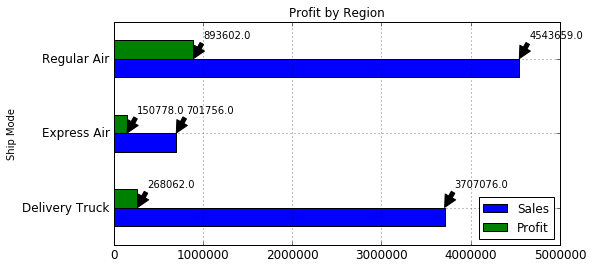

In [199]:
profit=Profit_by_region_shipMode.plot(kind="barh",figsize=(8,4),grid=True,title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12',stacked=False)

for indx, label in enumerate(list(Profit_by_region_shipMode.index)): 
       for col in Profit_by_region_shipMode.columns:
            value = np.round(Profit_by_region_shipMode.ix[indx][col],decimals=2)
            profit.annotate(value,
                        xy=(value, indx),
                        xytext=(10,20),
                         textcoords='offset points',
                       arrowprops=dict(facecolor='black', shrink=0.01))
#                       horizontalalignment='top', verticalalignment='top')

#### Stacked Bar chart :

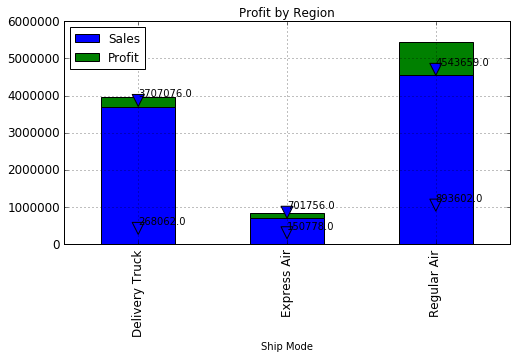

In [200]:
profit=Profit_by_region_shipMode.plot(kind="bar",figsize=(8,4),grid=True,title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12',stacked=True)

# To display data labels
for indx, label in enumerate(list(Profit_by_region_shipMode.index)): 
       for col in Profit_by_region_shipMode.columns:
            value = np.round(Profit_by_region_shipMode.ix[indx][col],decimals=2)
            profit.annotate(value,
                        xy=(indx, value),
                        xytext=(0,10),
                         textcoords='offset points',
                       arrowprops=dict(facecolor='blue', shrink=0.01))
#                       horizontalalignment='top', verticalalignment='top')




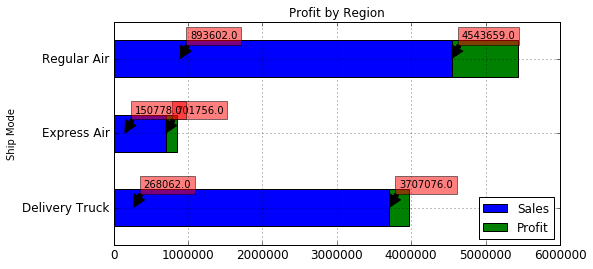

In [201]:
profit=Profit_by_region_shipMode.plot(kind="barh",figsize=(8,4),grid=True,title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12',stacked=True)

for indx, label in enumerate(list(Profit_by_region_shipMode.index)): 
       for col in Profit_by_region_shipMode.columns:
            value = np.round(Profit_by_region_shipMode.ix[indx][col],decimals=2)
            profit.annotate(value, # value to be dispalyed
                        xy=(value, indx), # x and y axis
                        xytext=(10,20), # where to place the text
                         textcoords='offset points',
                         bbox=dict(facecolor='r', alpha=0.5), # box properties
                       arrowprops=dict(facecolor='black', shrink=0.01)) # arrow properties
#                       horizontalalignment='top', verticalalignment='top')




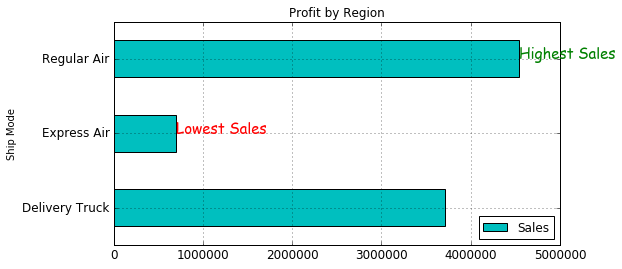

In [204]:
# Annotation with text to show the highest sales and lowest sales.
Sales_by_region_shipMode = sample_superStore[['Ship Mode','Sales']].groupby('Ship Mode').agg('sum').round()
Max_Sales = Sales_by_region_shipMode.Sales.max()
Min_Sales = Sales_by_region_shipMode.Sales.min()

Sales =Sales_by_region_shipMode.plot(kind="barh",figsize=(8,4),grid=True,title='Profit by Region',label='Profit',
        use_index=True,legend=True ,fontsize ='12',stacked=True,color='c')

for indx , label in enumerate(list(Sales_by_region_shipMode.index)):
    for cols in Sales_by_region_shipMode.columns:
        value = Sales_by_region_shipMode.ix[indx][cols]
        if (value == Max_Sales ):
            Sales.text(value,indx,'Highest Sales',fontdict={'family':'fantasy','size':15,'color':'g'})
        if (value == Min_Sales ):
            Sales.text(value,indx,'Lowest Sales',fontdict={'family':'fantasy','size':15,'color':'r'})



#### Scatter plot:

In [196]:
Profit_by_state = sample_superStore[['State or Province','Sales','Profit']].groupby('State or Province').agg('sum').round()
Profit_by_state.head(3)

,Sales,Profit
State or Province,,
Alabama,126707.0,10772.0
Arizona,120397.0,43506.0
Arkansas,96189.0,9433.0


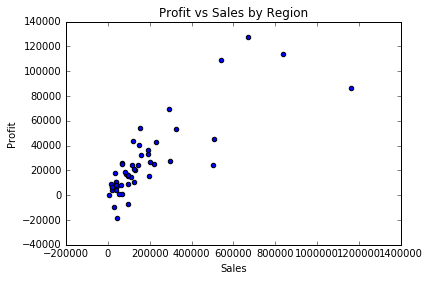

In [197]:
Profit_by_state.plot(kind='scatter', x='Sales', y='Profit', title = 'Profit vs Sales by Region')

#### Pie chart :

In [62]:
Customer_seg = sample_superStore['Customer Segment'].value_counts()
Customer_seg

Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: Customer Segment, dtype: int64

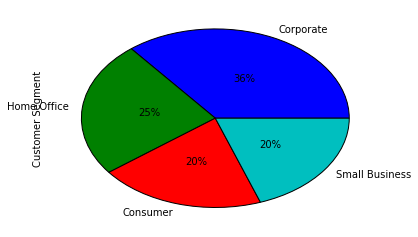

In [9]:
Customer_seg.plot(kind='pie',autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)

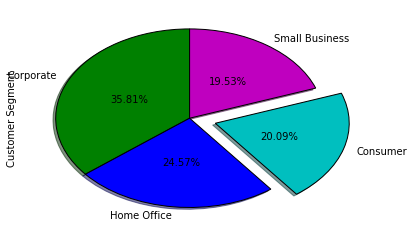

In [72]:
Customer_seg.plot(kind='pie',autopct='%1.2f%%', pctdistance=0.5, labeldistance=1.1,explode=[0,0,0.2,0],startangle=90,
                 colors=['g','b','c','m'],shadow=True)

#### Line Chart :

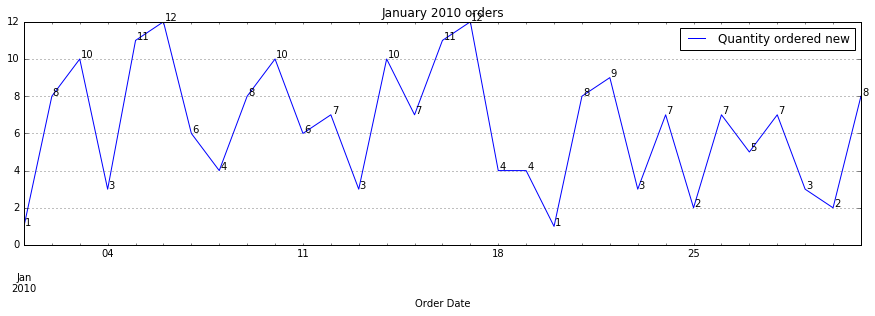

In [343]:
Qty_ordered = sample_superStore[['Order Date','Quantity ordered new']].groupby('Order Date').agg("count")
Qty_ordered_jan=Qty_ordered[pd.datetime(2010, 1, 1):pd.datetime(2010, 1, 31)]
Qty_ordered = Qty_ordered_jan.plot(kind='line',grid=True, legend=True,label='timeseries',title='January 2010 orders',
                                   figsize=(15, 4),color='b')

# Display data labels
for indx, label in enumerate(list(Qty_ordered_jan.index)): 
        for col in Qty_ordered_jan.columns:
            value = np.round(Qty_ordered_jan.ix[indx][col],decimals=2)
            Qty_ordered.annotate(value,
                        xy=(label, value),
                        xytext=(1,1),
                         textcoords='offset points')
#                       arrowprops=dict(facecolor='black', shrink=0.01))
#                       horizontalalignment='top', verticalalignment='top')


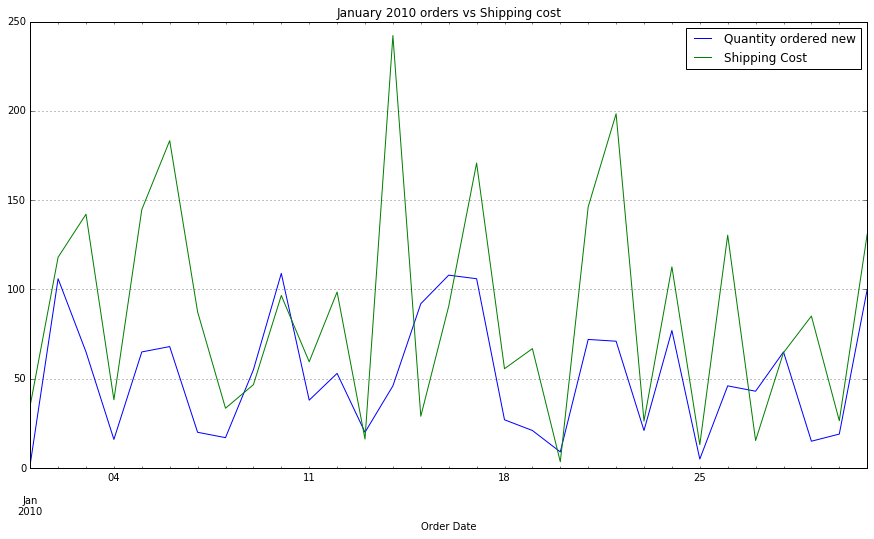

In [286]:
Qty_ordered = sample_superStore[['Order Date','Quantity ordered new','Shipping Cost']].groupby('Order Date').agg("sum")
Qty_ordered_jan=Qty_ordered[pd.datetime(2010, 1, 1):pd.datetime(2010, 1, 31)]
Qty_ordered_jan.plot(kind='line',grid=True, legend=True,label='timeseries',
                     title='January 2010 orders vs Shipping cost',figsize=(15, 8),ylim=(0, 250))

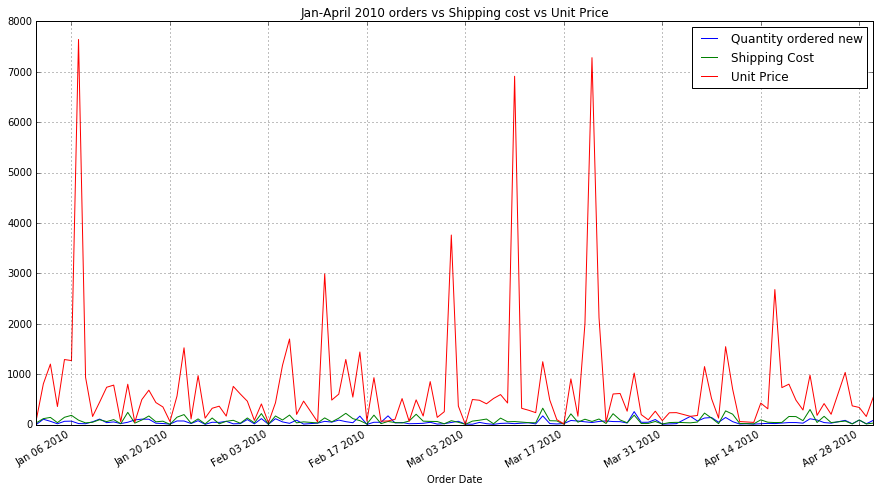

In [293]:
Qty_ordered = sample_superStore[['Order Date','Quantity ordered new','Shipping Cost','Unit Price']].groupby('Order Date').agg("sum")
Qty_ordered_jan=Qty_ordered[pd.datetime(2010, 1, 1):pd.datetime(2010, 4, 30)]
Qty_ordered_jan.plot(kind='line',grid=True, legend=True,label='timeseries',
                     title='Jan-April 2010 orders vs Shipping cost vs Unit Price',figsize=(15, 8))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022A03DA0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022C69C88>], dtype=object)

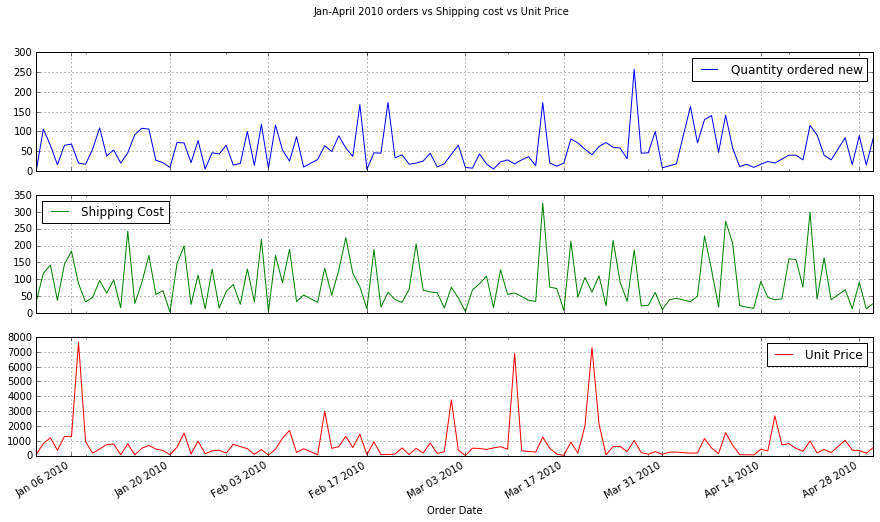

In [296]:
# Now if i want to view each graph seperately -
Qty_ordered_jan.plot(kind='line',grid=True, legend=True,label='timeseries',
                     title='Jan-April 2010 orders vs Shipping cost vs Unit Price',figsize=(15, 8),subplots=True)

### 2. Data Visualization with matplotlib :

In [27]:
import matplotlib.pyplot as plt

In [28]:
sample_superStore.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523


#### Line graph :

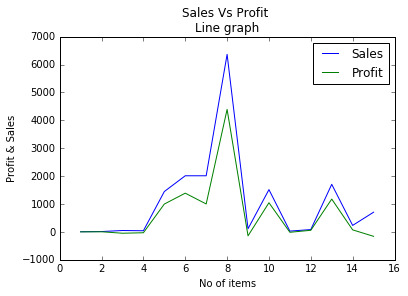

In [100]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Sales = sample_superStore.Sales.head(15)
Profit = sample_superStore.Profit.head(15)

# Compare two numerical variables.
plt.plot(x,Sales,label='Sales')
plt.plot(x,Profit,label='Profit')
plt.xlabel('No of items')
plt.ylabel('Profit & Sales')
plt.title('Sales Vs Profit \nLine graph')
plt.legend()
plt.show()

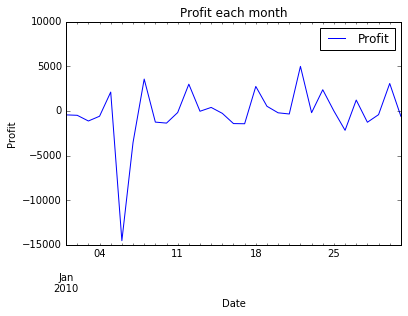

In [9]:
# Display the Profit for the given Date range
Profit=sample_superStore[['Profit','Order Date']].groupby('Order Date').sum().round()
Profit_for_Jan=Profit[pd.datetime(2010, 1, 1):pd.datetime(2010, 1, 31)]

Profit_for_Jan.plot.line(label='Profit for Jan 2010')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit each month')
plt.legend()
plt.show()

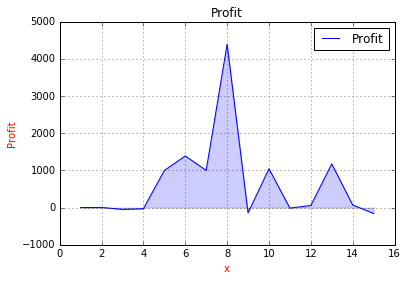

In [21]:
# Fill the area .
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Sales = sample_superStore.Sales.head(15)
Profit = sample_superStore.Profit.head(15)

#fig = plt.figure()  
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot(x,Profit,'-',label='Profit')
ax1.fill_between(x,Profit,alpha=0.2)    # fill the area,opacity is indicated by alpha
ax1.xaxis.label.set_color('r')  # set the xlabel color to red
ax1.yaxis.label.set_color('r')  # set the ylabel color to red

plt.xlabel('x')
plt.ylabel('Profit')
plt.title('Profit')
plt.grid(True)
plt.legend()
plt.show()

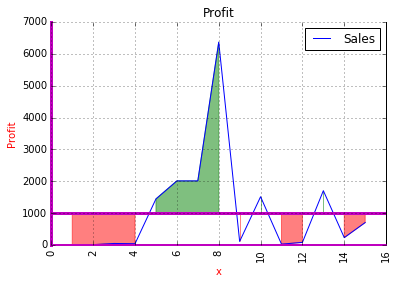

In [207]:
# Draw a line to indicate the Profit and Loss
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Sales = sample_superStore.Sales.head(15)
Profit = sample_superStore.Profit.head(15)

fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot(x,Sales,'-',label='Sales')
ax1.fill_between(x,Sales,1000,where=(Sales >= 1000),facecolor='g',edgecolor='g',alpha=0.5) # Median line is drawn at Sales =1000
                                    # Sales below 1000 is considered as loss and Sales above 1000 is considered as Profit
ax1.fill_between(x,Sales,1000,where=(Sales < 1000),facecolor='r',edgecolor='r',alpha=0.5) 
ax1.axhline(1000,color='m',linewidth=3)
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('r')
ax1.spines['left'].set_color('m')
ax1.spines['bottom'].set_color('m')
ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['top'].set_visible(False)

for l in ax1.xaxis.get_ticklabels(): # The xlabel is rotated at 90 degrees for better visibility
    l.set_rotation(90)

plt.xlabel('x')
plt.ylabel('Profit')
plt.title('Profit')
plt.grid(True)
plt.legend()
plt.show()

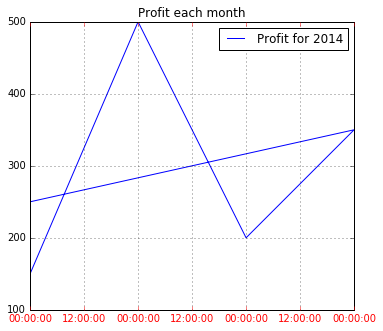

In [10]:
# Plot the value for Date.
Date = ['20140101','20140102','20140103','20140104','2014,0105']
Profit = [150,500,200,350,250]

fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(Date,Profit,'-',label='Profit for 2014')
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('r')
ax1.set_yticks([100,200,300,400,500]) #set the y label with the specified range
ax1.tick_params(axis='x',colors='r')

plt.title('Profit each month')
plt.subplots_adjust(left=0.2,right=0.95,top=1.95,bottom=0.95,wspace=0.5,hspace=0.5)
plt.legend()
plt.grid(True)
plt.show()

#### Bar chart :

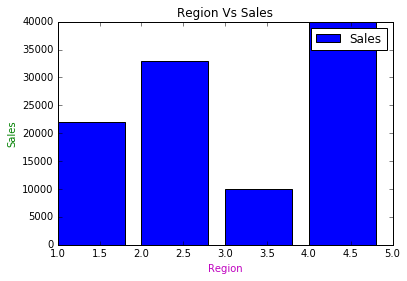

In [246]:
Region = [1,2,3,4]
Sales =  [22000,33000,10000,40000]

# Compare a categorical variable with a numerical variable.
plt.bar(Region,Sales,label='Sales')
plt.xlabel('Region',color='m')
plt.ylabel('Sales',color='g')
plt.title('Region Vs Sales')
plt.legend()
plt.show()

In [95]:
Profit_by_region=sample_superStore[['Sales','Profit','Region']].groupby('Region').sum().round()
Profit_by_region

,Sales,Profit
Region,,
Central,2540342.0,519826.0
East,2422805.0,377566.0
South,1597346.0,104201.0
West,2391999.0,310849.0


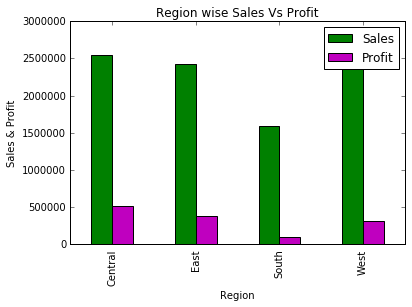

In [99]:
# Compare two categorical variable with a numerical variable.
Profit_by_region.plot.bar(label=['Sales','Profit'],colors=['g','m'])
plt.xlabel('Region')
plt.ylabel('Sales & Profit')
plt.title('Region wise Sales Vs Profit')
plt.legend()
plt.show()


#### Histogram :

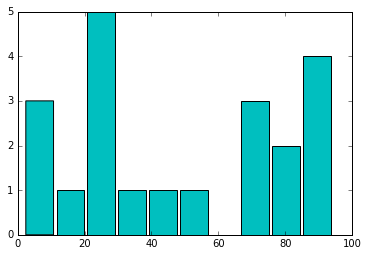

In [26]:
# distribution of data .
x = [4,5,2,16,24,67,89,34,27,78,90,23,23,78,74,85,70,94,22,45,54]
plt.hist(x,bins=10,histtype='bar',rwidth=0.9,color='c')
plt.show()

# From the below graph we come to conclusion that the data is heavily distributed from 20 to 30 . 
# No distribution from 60 to 70.

#### Scatter plot :

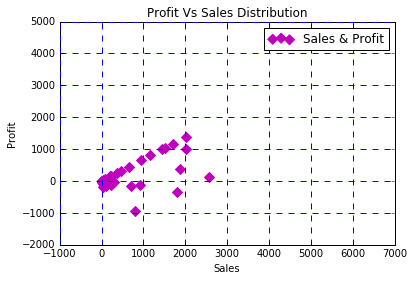

In [240]:
plt.scatter(Sales,Profit,label='Sales & Profit',s=50,color='m',marker='D')
plt.title('Profit Vs Sales Distribution')
plt.grid(True,color='b',linewidth=1,linestyle='--')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

#### Area chart :

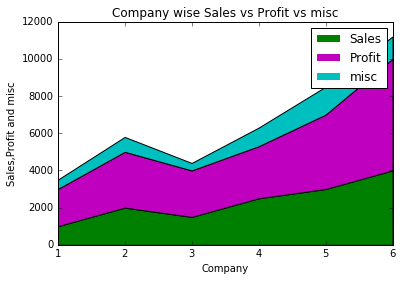

In [61]:
Company = [1,2,3,4,5,6]
Sales = [1000,2000,1500,2500,3000,4000]
Profit = [2000,3000,2500,2800,4000,6000]
misc = [500,800,400,1000,1500,1200]

plt.plot([],[],label='Sales',color='g',linewidth=7) # To show the labels as stackplot has no features to display labels.
plt.plot([],[],label='Profit',color='m',linewidth=7)
plt.plot([],[],label='misc',color='c',linewidth=7)
plt.stackplot(Company,Sales,Profit,misc,colors=['g','m','c'])
plt.xlabel('Company')
plt.ylabel('Sales,Profit and misc')
plt.title('Company wise Sales vs Profit vs misc')
plt.legend()
plt.show()

#### Pie chart :

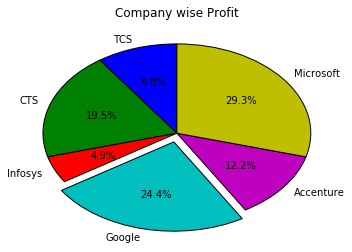

In [76]:
Company = ['TCS','CTS','Infosys','Google','Accenture','Microsoft']
Profit = [20000,40000,10000,50000,25000,60000]

plt.pie(Profit,labels=Company,autopct='%1.1f%%',startangle=90,explode=(0,0,0,0.1,0,0))
plt.title('Company wise Profit')
plt.show()

#### Combination chart :

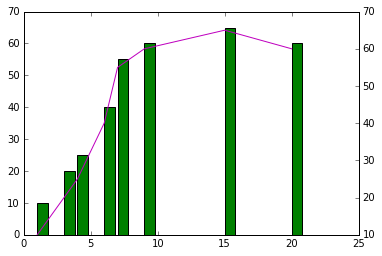

In [77]:
x =[1,3,4,6,7,9,15,20]
y =[10,20,25,40,55,60,65,60]

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=5,colspan=1) 
ax1v = ax1.twinx()
ax1.bar(x,y,color='g')
ax1v.plot(x,y,color='m')

plt.legend()
plt.show()

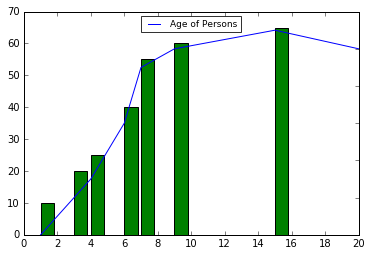

In [78]:
import matplotlib.ticker as mtick
x =[1,3,4,6,7,9,15,20]
y =[10,20,25,40,55,60,65,60]

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=5,colspan=1) 
ax1v = ax1.twinx()
ax1v.axes.yaxis.set_ticklabels([]) # removes the yaxis values in the right side of the plot
ax1v.set_xlim(0,20) # sets the lower and upper limit values for x axis
ax1.xaxis.set_major_locator(mtick.MaxNLocator(nbins=10)) # sets no of bins in the x axis
ax1.plot([],[],label='Age of Persons') # add legend to the graph
legend=ax1.legend(loc=9,prop={'size':9}) # set the legend properties
legend.get_frame().set_alpha(0.8) # set the opacity for the legend

ax1.bar(x,y,color='g')
ax1v.plot(x,y)

#### Maps in matplotlib :

In [ ]:
#Steps to install basemap in anaconda :
# 1. Go to this link https://www.lfd.uci.edu/~gohlke/pythonlibs/ and download the basemap for the python version used.
# 2. Type this in Anaconda command prompt : 
#    conda install -c conda-forge basemap=1.1.1      
#    (basemap=1.1.1  is the basemap version i installed .)

In [3]:
# Library used for basemap
from mpl_toolkits.basemap import Basemap

# Tool kit for basemap :
# https://matplotlib.org/basemap/

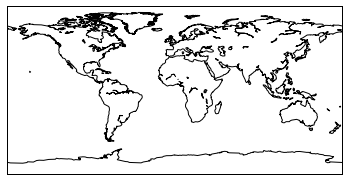

In [23]:
# find the list of projections  in https://matplotlib.org/basemap/users/mapsetup.html
x_map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x_map.drawcoastlines()
plt.show()

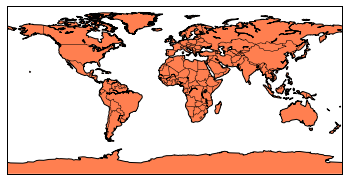

In [24]:
x_map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x_map.drawcoastlines()
x_map.fillcontinents(color='coral')  # fill the map with color
x_map.drawcountries() # draw the country boundary line .
plt.show()

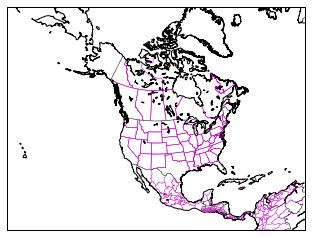

In [39]:
x_map = Basemap(width=12000000,height=9000000,
            resolution='l',projection='eqdc',\
            lat_1=45.,lat_2=60,lat_0=50,lon_0=-107.)
x_map.drawcoastlines()
x_map.drawcountries() # draw the country boundary line .
x_map.drawstates(color='m') #draw the state boundary line
plt.show()

In [15]:
# Now lets get the data from txt file and plot in map.
data = pd.read_csv('C:\\Users\\nandh\\Documents\\Python\\spatial data.txt',sep="\t")
data.head(3)

,Country,State,ProductName,ProductPrice,QtySold,SalesAmount,Geo,latitude,longitude
0,India,Karnataka,Pen,18.0,245,4410.0,0xE61000000107FA150000FED069CB836C26406975D77C...,21.000,78.500
1,United States,Texas,Pencil,12.0,349,4188.0,0xE6100000010758530000A847A6EC09E7334078BDEB93...,39.622,-98.606
2,India,Karnataka,FairAndLovely,55.0,9873,543015.0,0xE61000000107FA150000FED069CB836C26406975D77C...,21.000,78.500


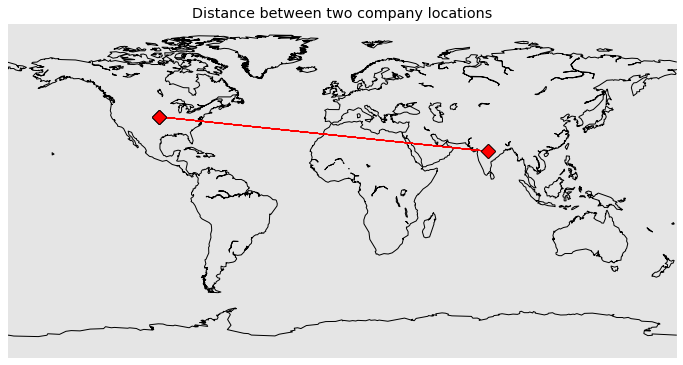

In [51]:
plt.figure(figsize=(12,12))
x_map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x_map.drawcoastlines()

l1 = data.longitude
lons=l1.tolist()

l2 = data.latitude
lats=l2.tolist()

x, y = x_map(lons, lats)
x_map.plot(x,y, marker='D',color='r',markersize=10)
plt.title('Distance between two company locations')
plt.show()


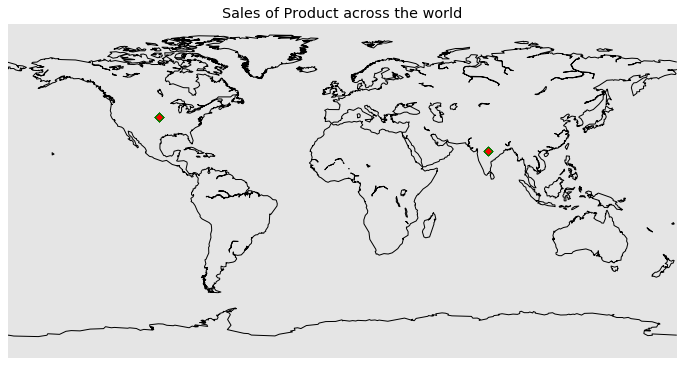

In [50]:
plt.figure(figsize=(12,12))
x_map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x_map.drawcoastlines()

l1 = data.longitude
lons=l1.tolist()

l2 = data.latitude
lats=l2.tolist()

x, y = x_map(lons, lats)
x_map.scatter(x, y, marker='D',s=35,color='r',edgecolors='g',linewidths =1)

plt.title('Sales of Product across the world')
plt.show()


In [8]:
import pyodbc
con = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-DOD6MI5;DATABASE=Amazon_DWH;')
cursor = con.cursor()

Sample_Store = []
sample_db= cursor.execute("select * from dbo.sample_store")

for row in cursor.fetchall():
    Sample_Store.append(row)
Sample_Store



[(25061.0, u'Not Specified', 0.08, 6.98, 1.6, 1873.0, u'Lisa Kim', u'Regular Air', u'Corporate', u'Office Supplies', u'Paper', u'Wrap Bag', u'Adams Phone Message Book, Professional, 400 Message Capacity, 5 3/6\u201d x 11\u201d', 0.38, u'South', u'Florida', u'Palm Beach Gardens', 33403.0, datetime.datetime(2013, 5, 12, 0, 0), datetime.datetime(2013, 5, 13, 0, 0), 103.572, 7.0, 45.46, 90101.0, 26.844373, -80.087304),
 (20844.0, u'Critical', 0.09, 95.99, 4.9, 1875.0, u'Martin Kirk', u'Regular Air', u'Consumer', u'Technology', u'Telephones and Communication', u'Small Box', u'T60', 0.56, u'South', u'Virginia', u'Chesapeake', 23320.0, datetime.datetime(2010, 1, 29, 0, 0), datetime.datetime(2010, 1, 31, 0, 0), 34.302, 4.0, 320.75, 90899.0, 38.455089, -82.450448),
 (23830.0, u'Not Specified', 0.08, 205.99, 8.99, 1875.0, u'Martin Kirk', u'Regular Air', u'Consumer', u'Technology', u'Telephones and Communication', u'Small Box', u'TimeportP7382', 0.56, u'South', u'Virginia', u'Chesapeake', 23320.0

In [53]:
import pyodbc

cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-DOD6MI5;DATABASE=Amazon_DWH;')
cursor = cnxn.cursor()
sql = "select * from dbo.sample_store"

sample_store = pd.read_sql(sql, cnxn)
sample_store.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Latitude,Longitude
0,25061.0,Not Specified,0.08,6.98,1.60,1873.0,Lisa Kim,Regular Air,Corporate,Office Supplies,...,Palm Beach Gardens,33403.0,2013-05-12,2013-05-13,103.5720,7.0,45.46,90101.0,26.844373,-80.087304
1,20844.0,Critical,0.09,95.99,4.90,1875.0,Martin Kirk,Regular Air,Consumer,Technology,...,Chesapeake,23320.0,2010-01-29,2010-01-31,34.3020,4.0,320.75,90899.0,38.455089,-82.450448
2,23830.0,Not Specified,0.08,205.99,8.99,1875.0,Martin Kirk,Regular Air,Consumer,Technology,...,Chesapeake,23320.0,2011-09-23,2011-09-24,-174.7816,22.0,3791.92,90900.0,38.455089,-82.450448


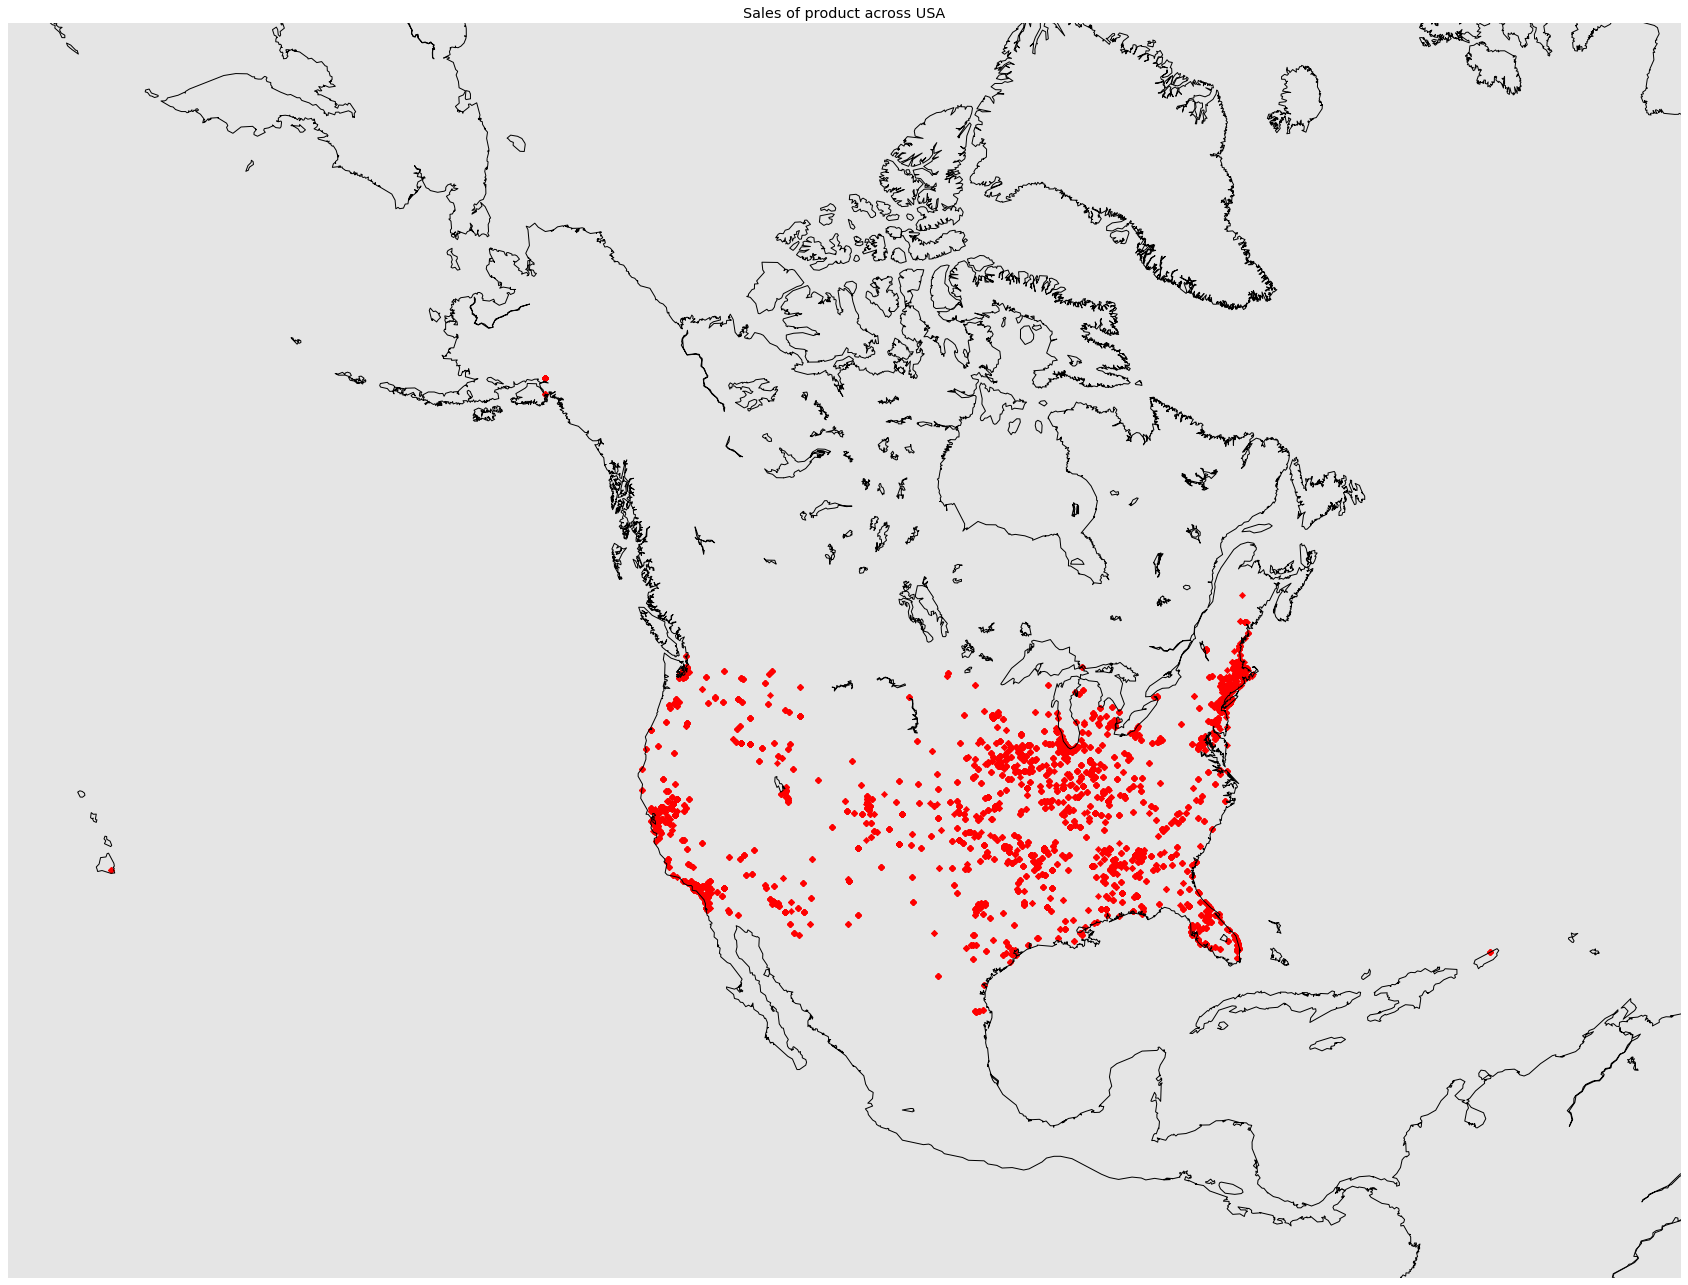

In [55]:
plt.figure(figsize=(30,40))
x_map = Basemap(width=12000000,height=9000000,
            resolution='l',projection='eqdc',\
            lat_1=45.,lat_2=60,lat_0=50,lon_0=-107.)
x_map.drawcoastlines()

l1 = sample_store.Longitude
lons=l1.tolist()

l2 = sample_store.Latitude
lats=l2.tolist()

x, y = x_map(lons, lats)

x_map.scatter(x, y, marker='D',color='r')
plt.title('Sales of product across USA')
plt.show()


In [63]:
High_Sales_Region= sample_store.loc[sample_store.Sales >= 50000]
High_Sales_Region

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Latitude,Longitude
7615,6852.0,Not Specified,0.04,3499.99,24.49,2565.0,Amanda Kay,Regular Air,Home Office,Technology,...,Seattle,98144.0,2011-10-22,2011-10-23,228.0904,14.0,50332.66,48800.0,47.611435,-122.330456
8972,5235.0,Low,0.03,880.98,44.55,3075.0,Gordon Brandt,Delivery Truck,Corporate,Furniture,...,Los Angeles,90061.0,2012-11-19,2012-11-24,7497.5500,116.0,100119.16,37252.0,33.973093,-118.247896


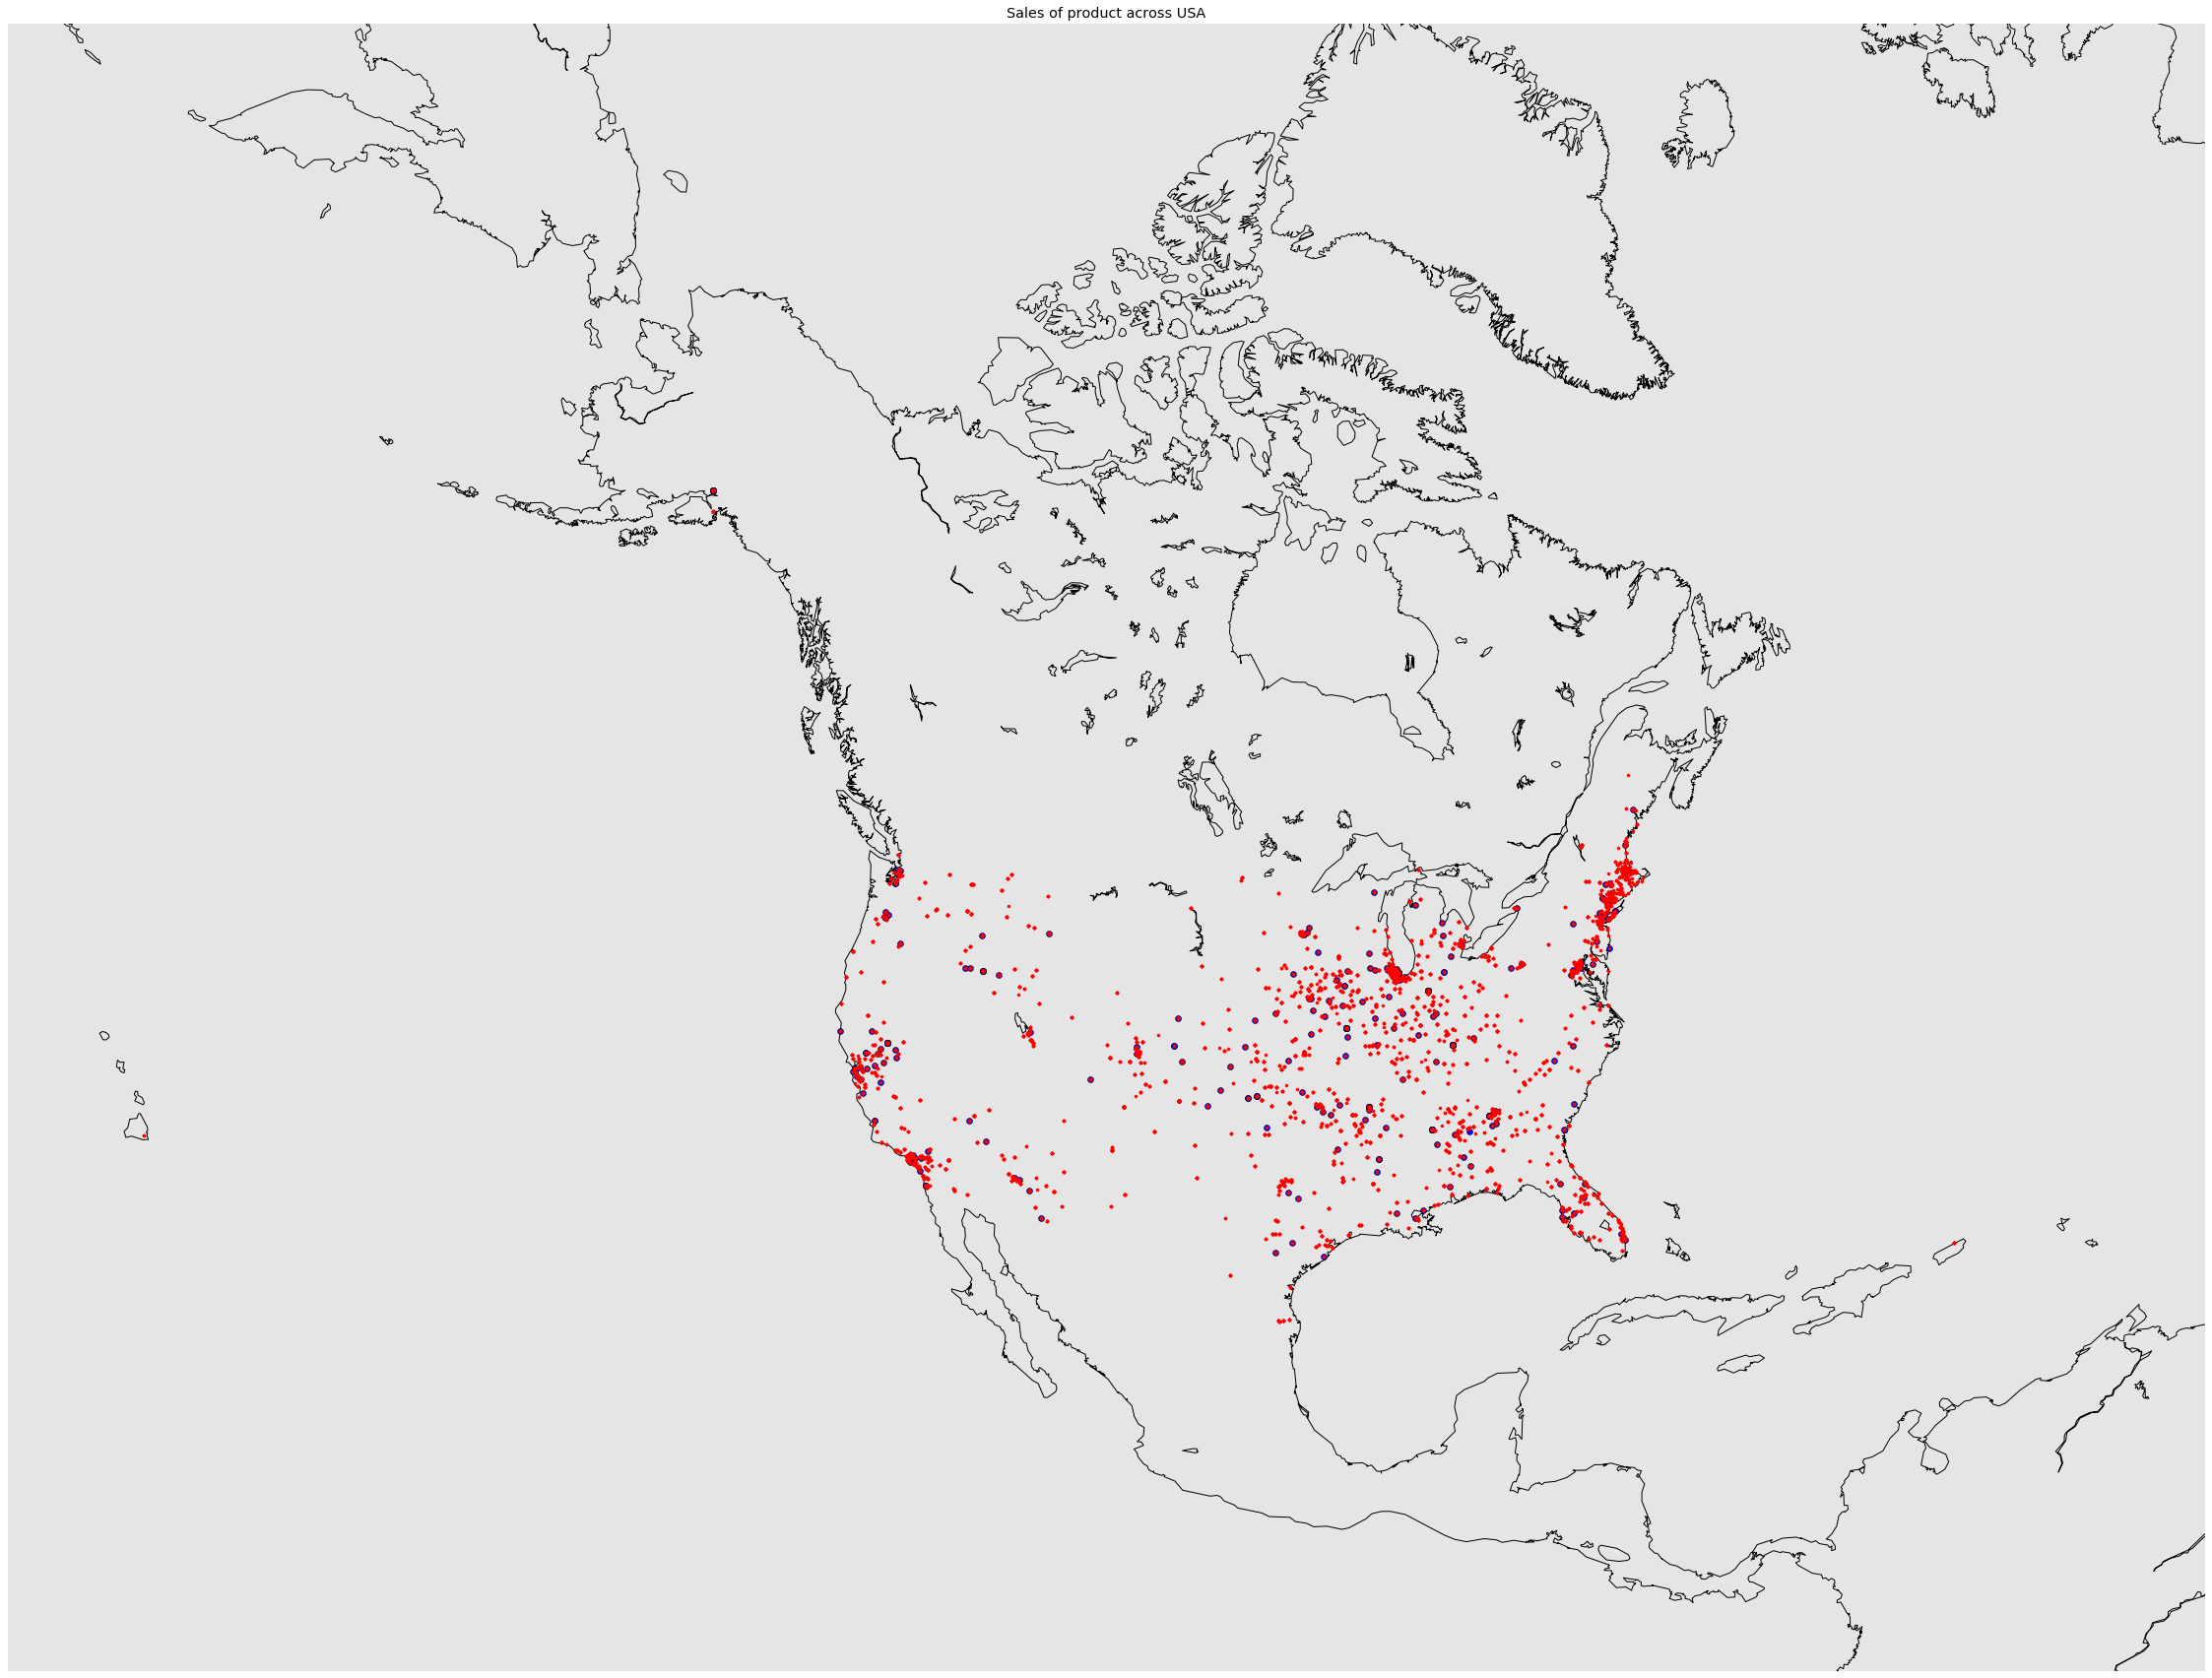

In [80]:
# Plot city which has sales above 50000

High_Sales_Region= sample_store.loc[sample_store.Sales >= 50000]
Low_Sales_Region= sample_store.loc[sample_store.Sales <= 5000]
Average_Sales_Region= sample_store.loc[(sample_store.Sales > 5000) & (sample_store.Sales < 50000)]

plt.figure(figsize=(40,40))
x_map = Basemap(width=12000000,height=9000000,
            resolution='l',projection='eqdc',\
            lat_1=45.,lat_2=60,lat_0=50,lon_0=-107.)
x_map.drawcoastlines()

l1 = High_Sales_Region.Longitude
lons=l1.tolist()
l2 = High_Sales_Region.Latitude
lats=l2.tolist()
x1, y1 = x_map(lons, lats)
x_map.plot(x1,y1,'g*',markersize=10)

m1 = Average_Sales_Region.Longitude
lons=m1.tolist()
m2 = Average_Sales_Region.Latitude
lats=m2.tolist()
x2, y2 = x_map(lons, lats)
#x_map.scatter(x2, y2, marker='D',color='m')
x_map.plot(x2,y2,'bo')

n1 = Low_Sales_Region.Longitude
lons=n1.tolist()
n2 = Low_Sales_Region.Latitude
lats=n2.tolist()
x3, y3 = x_map(lons, lats)
#x_map.scatter(x3, y3, marker='D',color='r')
x_map.plot(x3,y3, 'r.')

plt.title('Sales of product across USA')
plt.show()


#### Candle stick plot :

In [15]:
from matplotlib.finance import candlestick_ohlc

In [21]:
Profit_Sales=sample_superStore[['Order Date','Profit','Sales']].groupby('Order Date').sum().round()
Profit_for_Jan=Profit_Sales[pd.datetime(2010, 1, 1):pd.datetime(2010, 1, 31)]

l_value = []
for idx,label in enumerate(list(Profit_for_Jan.index)):
    for col in Profit_for_Jan.columns:
        value = label,round(Profit_for_Jan.ix[idx][col],2)
        l_value.append(value)


#### Predefined styles in matplotlib :


In [46]:
# Find the style gallery in the link -
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# or

print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [ ]:
# If you dont like any of these styles and want to resume the actual one then run this -
# because %matplotlib inline uses its own rcParams
%matplotlib inline

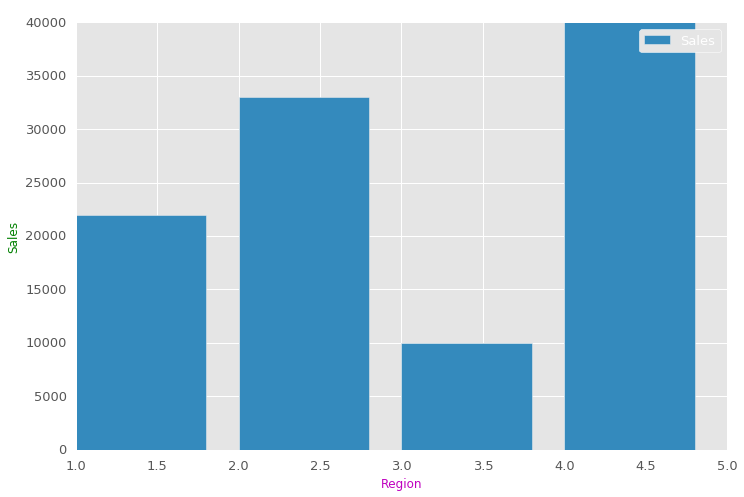

In [44]:
plt.style.use('ggplot')

Region = [1,2,3,4]
Sales =  [22000,33000,10000,40000]

# Compare a categorical variable with a numerical variable.
plt.bar(Region,Sales,label='Sales')
plt.xlabel('Region',color='m')
plt.ylabel('Sales',color='g')
plt.title('Region Vs Sales')
plt.legend()
plt.show()

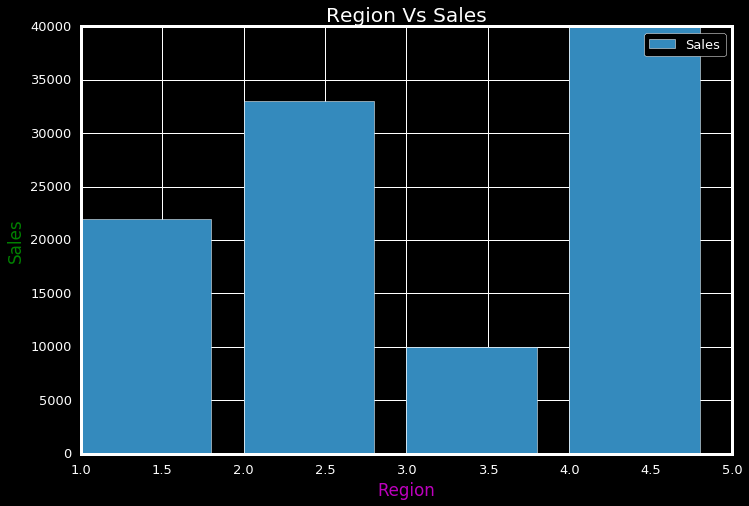

In [43]:
plt.style.use('dark_background')

Region = [1,2,3,4]
Sales =  [22000,33000,10000,40000]

# Compare a categorical variable with a numerical variable.
plt.bar(Region,Sales,label='Sales')
plt.xlabel('Region',color='m')
plt.ylabel('Sales',color='g')
plt.title('Region Vs Sales')
plt.legend()
plt.show()

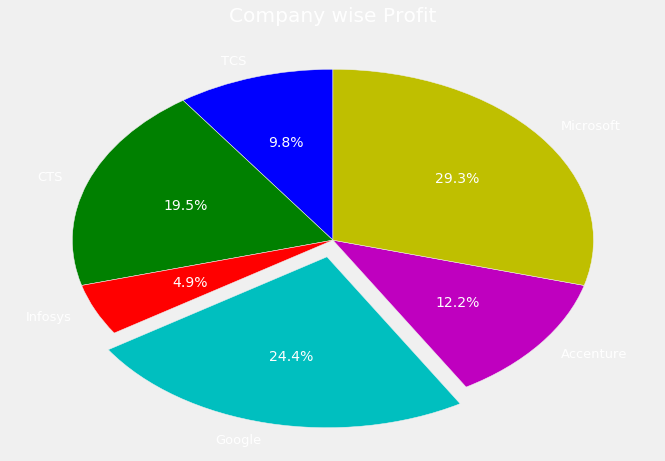

In [45]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Company = ['TCS','CTS','Infosys','Google','Accenture','Microsoft']
Profit = [20000,40000,10000,50000,25000,60000]

plt.pie(Profit,labels=Company,autopct='%1.1f%%',startangle=90,explode=(0,0,0,0.1,0,0))
plt.title('Company wise Profit')
plt.show()

#### View multiple plots :

<Container object of 8 artists>

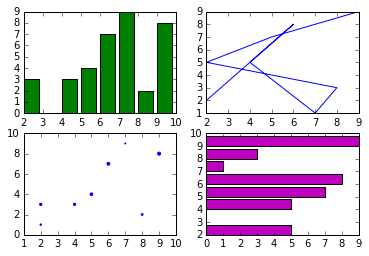

In [140]:
# Method 1 :
x =[2,6,4,7,8,2,5,9]
y =[1,7,3,9,2,3,4,8]
z =[2,8,5,1,3,5,7,9]

# Create an empty figure
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.bar(x,y,color='g')
ax2.plot(x,z)
ax3.scatter(x,y,z,color='b')
ax4.barh(x,z,color='m')


<Container object of 8 artists>

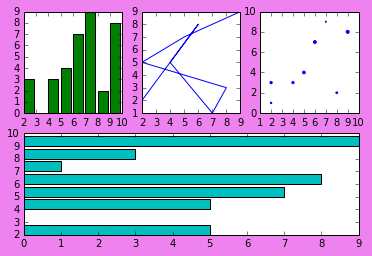

In [76]:
# Method 1 :

x =[2,6,4,7,8,2,5,9]
y =[1,7,3,9,2,3,4,8]
z =[2,8,5,1,3,5,7,9]

# Create an empty figure
fig = plt.figure(facecolor='violet') # facecolor adds color to the background

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 1, 2)


ax1.bar(x,y,color='g')
ax2.plot(x,z)
ax3.scatter(x,y,z,color='b')
ax4.barh(x,z,color='c')


<Container object of 7 artists>

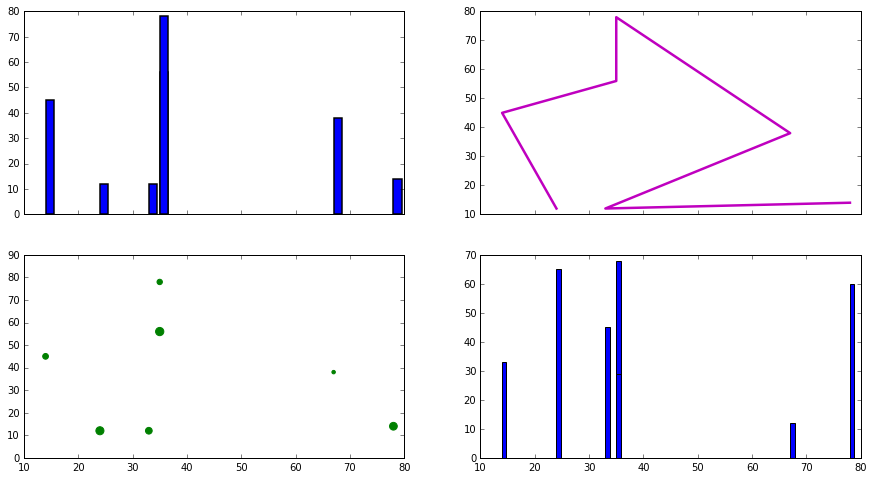

In [197]:
# Method 2:
x =[24,14,35,35,67,33,78]
y =[12,45,56,78,38,12,14]
z =[65,33,68,29,12,45,60]

fig, ax = plt.subplots(2, 2, figsize = (15,8), sharex=True)

ax[0, 0].bar(x,y,color='b',width=1.5,linewidth=1.5)
ax[0, 1].plot(x,y,color='m',linewidth=2.5)
ax[1, 0].scatter(x,y,z, color='g')
ax[1, 1].bar(x,z)

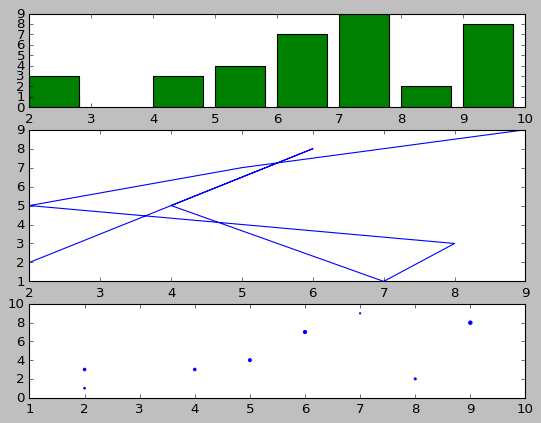

In [8]:
# Method 3 :
import matplotlib.ticker as mtick

plt.style.use('classic')
x =[2,6,4,7,8,2,5,9]
y =[1,7,3,9,2,3,4,8]
z =[2,8,5,1,3,5,7,9]

ax1 = plt.subplot2grid((20,1),(0,0),rowspan=5,colspan=1) # Where 20 is total length of row.
ax2 = plt.subplot2grid((20,1),(6,0),rowspan=8,colspan=1)
ax3 = plt.subplot2grid((20,1),(15,0),rowspan=5,colspan=1)

ax1.bar(x,y,color='g')
ax2.plot(x,z)
ax3.scatter(x,y,z,color='b')



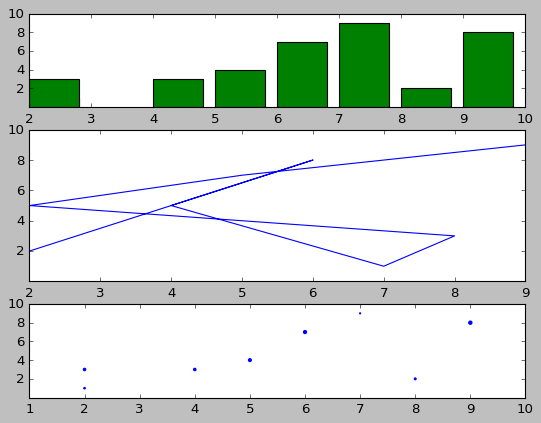

In [16]:
# In the above plot the y axis overlaps text is close to eaxh other and overlaps , 
# Inorder to avoid this we will have to add the below code.

import matplotlib.ticker as mtick

plt.style.use('classic')
x =[2,6,4,7,8,2,5,9]
y =[1,7,3,9,2,3,4,8]
z =[2,8,5,1,3,5,7,9]

ax1 = plt.subplot2grid((20,1),(0,0),rowspan=5,colspan=1) # Where 20 is total length of row.
ax2 = plt.subplot2grid((20,1),(6,0),rowspan=8,colspan=1)
ax3 = plt.subplot2grid((20,1),(15,0),rowspan=5,colspan=1)

ax1.yaxis.set_major_locator(mtick.MaxNLocator(nbins=5,prune='lower'))
ax2.yaxis.set_major_locator(mtick.MaxNLocator(nbins=5 ,prune='lower'))
ax3.yaxis.set_major_locator(mtick.MaxNLocator(nbins=5,prune='lower'))

ax1.bar(x,y,color='g')
ax2.plot(x,z)
ax3.scatter(x,y,z,color='b')

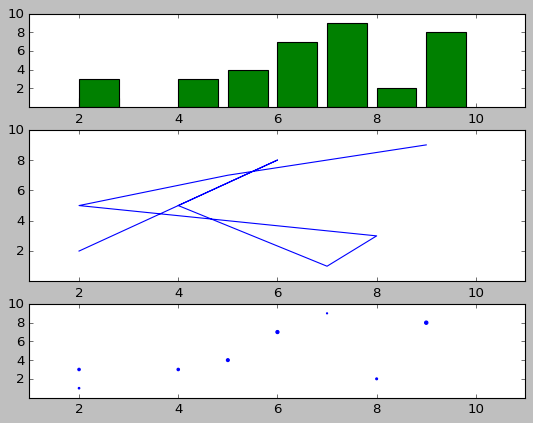

In [18]:
# In the above plot each plot starts at differnt points . If we want to share the x axis then we need to include sharex.

import matplotlib.ticker as mtick

plt.style.use('classic')
x =[2,6,4,7,8,2,5,9]
y =[1,7,3,9,2,3,4,8]
z =[2,8,5,1,3,5,7,9]

ax1 = plt.subplot2grid((20,1),(0,0),rowspan=5,colspan=1) # Where 20 is total length of row.
ax2 = plt.subplot2grid((20,1),(6,0),rowspan=8,colspan=1,sharex=ax1)
ax3 = plt.subplot2grid((20,1),(15,0),rowspan=5,colspan=1,sharex=ax1)

ax1.yaxis.set_major_locator(mtick.MaxNLocator(nbins=5,prune='lower'))
ax2.yaxis.set_major_locator(mtick.MaxNLocator(nbins=5 ,prune='lower'))
ax3.yaxis.set_major_locator(mtick.MaxNLocator(nbins=5,prune='lower'))

ax1.bar(x,y,color='g')
ax2.plot(x,z)
ax3.scatter(x,y,z,color='b')

#### Animation in matplotlib :

In [61]:
import matplotlib.animation as an

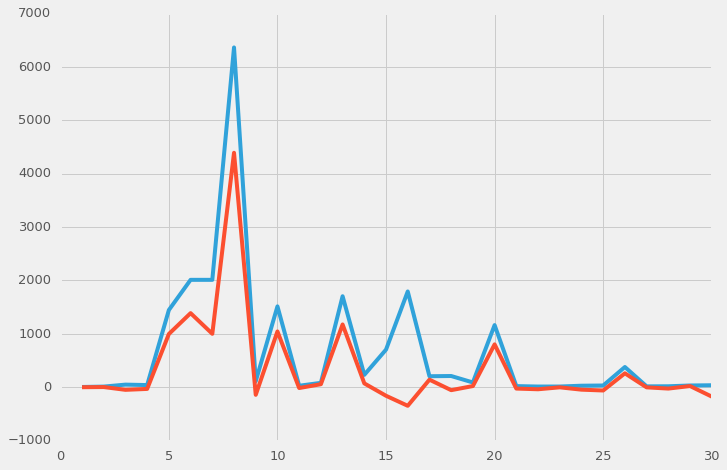

In [86]:
# When you change the values of x and y axis values in the function the plot is automatically updated every 1 second.

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def fn_Prof_Sales(i):
    Sales = sample_superStore['Sales'].head(30)
    Profit = sample_superStore['Profit'].head(30)
    x=np.linspace(1,30,30)
    ax1.plot(x,Sales)
    ax1.plot(x,Profit) 
ani = an.FuncAnimation(fig,fn_Prof_Sales,interval=1000)
plt.show()